<a href="https://colab.research.google.com/github/adityak957/twitterSentimentAnalysis-LogisticRegression/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook I Present a simple regression modeling of the sentiment analysis of a database of tweets related to specific companies.This is structured as follows:

1.Initial data transformation

2.Plotting Features

3.Text Analysis

4.Logistic Regression Model

5.XGBoost Model


The main objective is to present a simple NLP Project and to practice the main uses of libaries such as wordCloud,sklearn, nltk and re

# 1. Initial Data Transformation

As an initial approach,all the main libraries and functions were summarized in the following cell, focusing on dataVisualization, text analysis, text vectorization and modelbuilding.

Additionaly,the stopwords fom english were downloaded from the nltk library

In [12]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import os
for dirname,_,filenames in os.walk('/content/'):
  for filename in filenames:
    print(os.path.join(dirname,filename))
from wordcloud import WordCloud #wordVisuals
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer #data transformation
from sklearn.model_selection import train_test_split #dataTesting
from sklearn.metrics import accuracy_score #comparison between real and predicted values
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # variable encoding and decoding for xgboost
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

/content/twitter_training.csv
/content/twitter_validation.csv
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/logs/2024.02.13/14.22.49.815065.log
/content/.config/logs/2024.02.13/14.22.40.428319.log
/content/.config/logs/2024.02.13/14.22.32.482030.log
/content/.config/logs/2024.02.13/14.21.57.851386.log
/content/.config/logs/2024.02.13/14.22.50.603761.log
/content/.config/logs/2024.02.13/14.22.23.056406.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

then the validation and train datasets were saved on two variables by using the function of read_csv from pandas , wehre both didn't have a data header


In [13]:
#Validation dataset
val=pd.read_csv("/content/twitter_validation.csv", header=None)
#Full dataset for Train-Test
train=pd.read_csv("/content/twitter_training.csv", header=None)

Later the columns were renamed to represent the given data of tweets. but with the first 5 rows analysis.it was recognized that positive sentiment was assigned to a 'Kill' thread related to a video game . even with this in consideration , the modelling, in the case, will the same as a  traditional NLP Project.

In [14]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Then, with the validation data, the information of the first 5 rows didn't show any unusual labeling.


In [15]:
val.columns = ['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [16]:
train_data = train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [17]:
val_data = val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


To Prepare the data for the text analysis an additional  row was created using the method of str.lower. However, as there were some texts with only numerical values(such as one that only had a 2 as the tweet) an additionalfunction was used for transforming all the data to string.
Then , a regex expression erased the special characters as it is common to have digitation problems on twitter.


In [19]:
# text transformation

train_data["lower"] = train_data.text.str.lower() #lowerCase
train_data["lower"] = [str(data) for data in train_data.lower] #ConvertingAllToString
train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+','',x)) #regex
val_data["lower"] = val_data.text.str.lower() #lowerCase
val_data["lower"] = [str(data) for data in val_data.lower] #converting all to string
val_data["lower"] = val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+','',x)) #regex

# the difference between the two text columns are presented in the next table

In [20]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,imgettingonborderlandsandiwillmurderyouall
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,iamcomingtothebordersandiwillkillyouall
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,imgettingonborderlandsandiwillkillyouall
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,imcomingonborderlandsandiwillmurderyouall
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,imgettingonborderlands2andiwillmurderyoumeall


# 2. Plotting Features

As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data.for example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "goodSentiments".


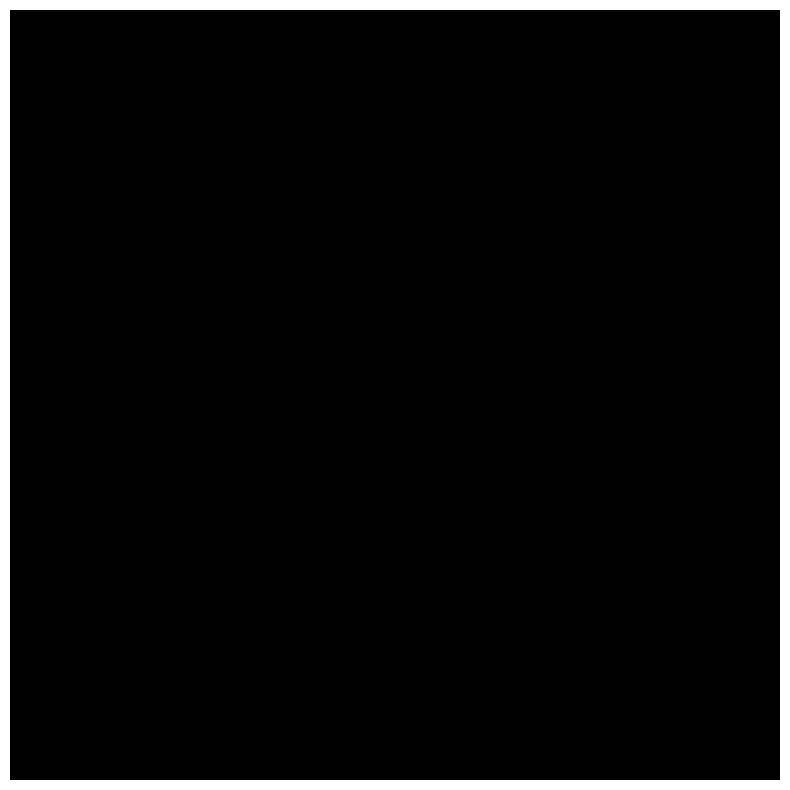

In [22]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
# generation of wordCloud

wordcloud = WordCloud(
    max_font_size =100,
    max_words = 100,
    background_color="black",
    scale=10,
    width=800,
    height=800
.generate(word_cloud_text)

#Figure Properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()